In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

%matplotlib inline

In [2]:
df = pd.read_csv("energydata_complete.csv")

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [20]:
new = df.drop(["date", "rv2"], axis=1)

col = new.columns

In [27]:
for cols in col:
    print(new[cols].nunique())

92
8
722
2547
1650
3376
1426
2618
1390
2987
2263
7571
4446
9709
1955
5891
2228
6649
924
3388
1730
2189
566
189
413
1409
19735


<AxesSubplot:>

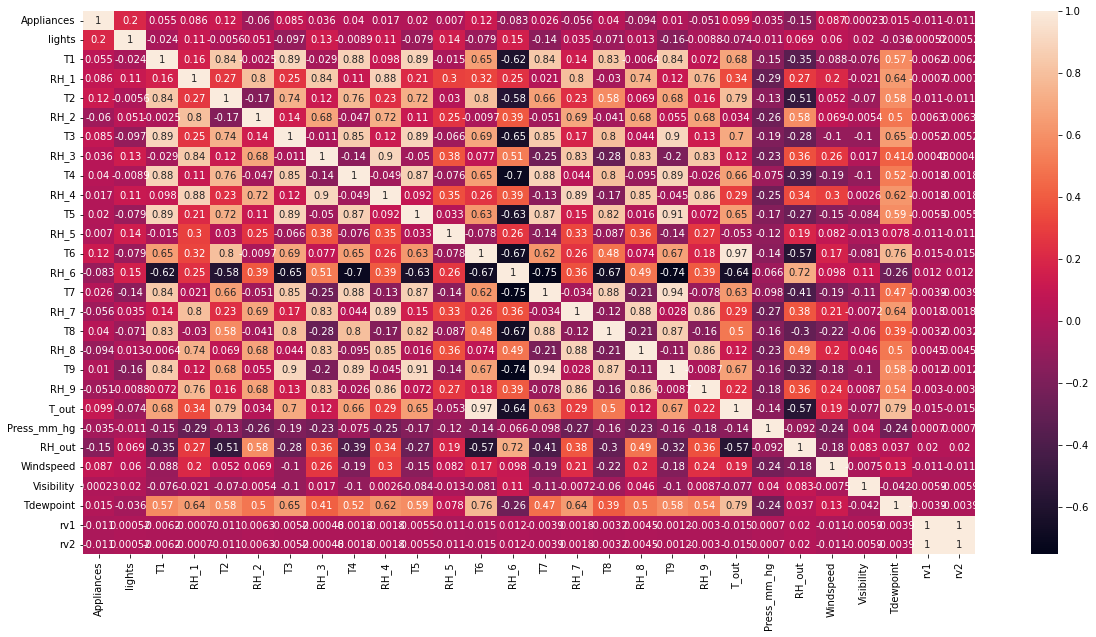

In [17]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

#  From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?

In [28]:
# Extract features and target
X = df['T2'].values.reshape(-1, 1)
y = df['T6'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


RMSE: 3.633


# Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

# What is the Mean Absolute Error (in three decimal places) for the  training set?

In [29]:
# Remove the specified columns
data = df.drop(columns=["date", "lights"])

# Define the features variables and the target variable
X = data.drop(columns=["Appliances"])
y = data["Appliances"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train_scaled)

# Calculate the Mean Absolute Error (MAE) for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)

# Print the MAE for the training set with three decimal places
print(f"Mean Absolute Error (Training): {mae_train:.3f}")


Mean Absolute Error (Training): 53.742


# What is the Root Mean Squared Error (in three decimal places) for the training set?

In [30]:
# Calculate RMSE on the test set
rmse = sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE: {rmse:.3f}")

RMSE: 95.216


# What is the Mean Absolute Error (in three decimal places) for test set?

In [31]:
# Make predictions on the training data
y_pred_test = model.predict(X_test_scaled)

# Calculate the Mean Absolute Error (MAE) for the training set
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the MAE for the training set with three decimal places
print(f"Mean Absolute Error (Training): {mae_test:.3f}")

Mean Absolute Error (Training): 53.643


# What is the Root Mean Squared Error (in three decimal places) for test set?

In [32]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {rmse:.3f}")

RMSE: 93.640


# Did the Model above overfit to the training set

Answer: NO

# Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [34]:
# Creating and training a Ridge regression model with default parameters
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_test = ridge_model.predict(X_test_scaled)
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {rmse:.3f}")


RMSE: 93.709


# Train a lasso regression model with default value and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [37]:
# Creating and training a Lasso regression model with default parameters
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

# Obtain the feature weights (coefficients)
feature_weights = lasso_model.coef_

non_zero_features = 0

for weight in feature_weights:
    if weight != 0:
        non_zero_features += 1

print(f"Number of features with non-zero feature weights: {non_zero_features}")

# Make predictions on the training data
y_pred_test = lasso_model.predict(X_test_scaled)
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {rmse:.3f}")


Number of features with non-zero feature weights: 4
RMSE: 99.424
